<a href="https://colab.research.google.com/github/Hit07/ML-DL-Torch/blob/main/Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PyTorch Workflow**
1. Prepare and load data
2. Build Model
3. Fitting the model to data for training
4. Making predictions and evaluating a model(inference)
5. Saving and loading the model
6. Consolidating all together.

## Imort Statements

In [4]:
import torch
import numpy as np
# Pytorch's building blocks of neural networks
from torch import nn
import matplotlib.pyplot as plt


# 1. Prepaing and Loading (Data Exploration)

1. Excel Spreadsheet
2. Images
3. Videos
4. Audio
5. DNA, Text...

Machine Leaning -> Numerical Representation -> build a model to learn the underlying patterns

Create known data using **linear regression** with know **parameters**.

In [12]:
# known parameters
weight = 0.7
bias = 0.3

#Create
start =0
end=1
step=0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias

len(X),len(y)

(50, 50)

# Splitting data into training and testing sets

1. Training set--> Model Learns patterns from here. ~60-80%
2. Validation set -> Tune model patterns. ~10-20%
3. Test set --> See if the model is ready for the wild. ~10-20%

In [28]:
# Create a train/test split
train_split  = int(0.8 * len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

In [31]:
# Vizualising the data
def plot_prediction(train_data=X_train, train_labels=y_train,
                    test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(5, 4), dpi=200)
    plt.scatter(train_data.numpy(), train_labels.numpy(), c='b', s=4, label='Training data')
    plt.scatter(test_data.numpy(), test_labels.numpy(), c='g', s=4, label='Test data')
    if predictions is not None:
        plt.scatter(test_data.numpy(), predictions.numpy(), c='r', s=4, label='Predictions')

    plt.legend(prop={'size': 14})
    plt.show()



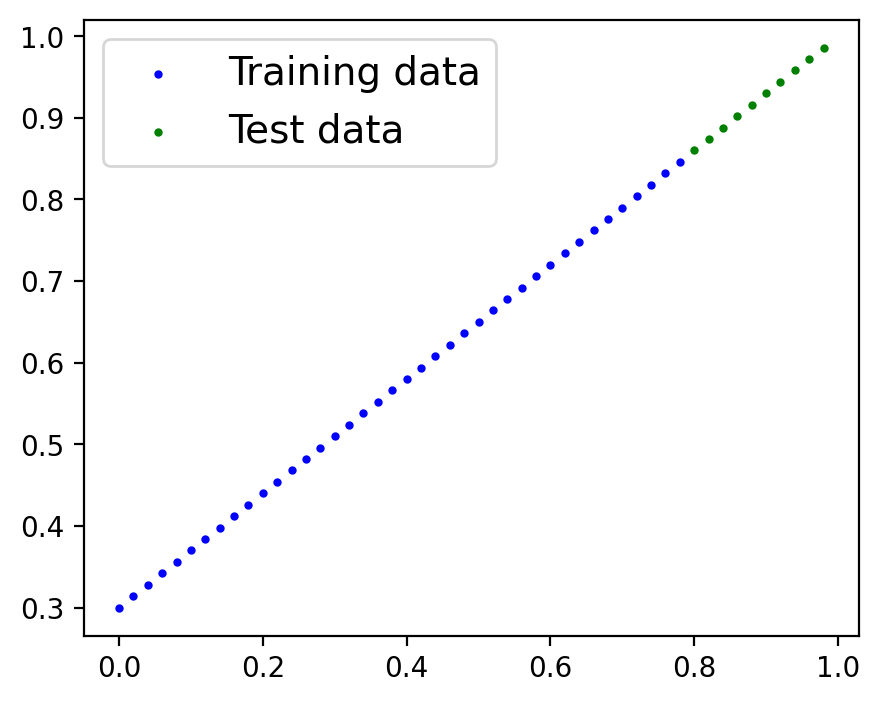

In [32]:
plot_prediction()

# 2. Buidl Linear Regression Model

*  Start with the random values
* Look at the training data and adjust the random values to better represent (get closer to) the ideal values ( weights and bias are used to create the data)

Achieved Throught two algorithms:
1. Gradient Descent
2. Backpropogation
*[Read More.....](https://www.geeksforgeeks.org/how-does-gradient-descent-and-backpropagation-work-together/)

## Model building essentials
* ```torch.nn``` - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* ````torch.nn.Parameter``` - what parameters should our model try and learn, often a Pylorch layer from torch.nn will set these for us
* ```torch.nn.Module``` - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* ```torch.optim``` - this where the optimizers in PyTorch live, they will help with gradient descent
* ```def forward() ```- All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

In [47]:
# Base class for all neural network model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    # Initialize the model paramenters with random numbers
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    # Forward method to define the model and x is input data
  def forward(self,x:torch.Tensor) -> torch.Tensor:
      return self.weights * x + self.bias



In [48]:
# Create a random seed
torch.manual_seed(42)

# Instantiate the Model
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [49]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

# 3.Make prediction using ```torch.infernce_mode()```

* We predict y_test based on X_test
* We can predictions without ``` torch.inferce_mode()```  but for large dataset it keeps track of gradient which makes it slower

In [50]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds,y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

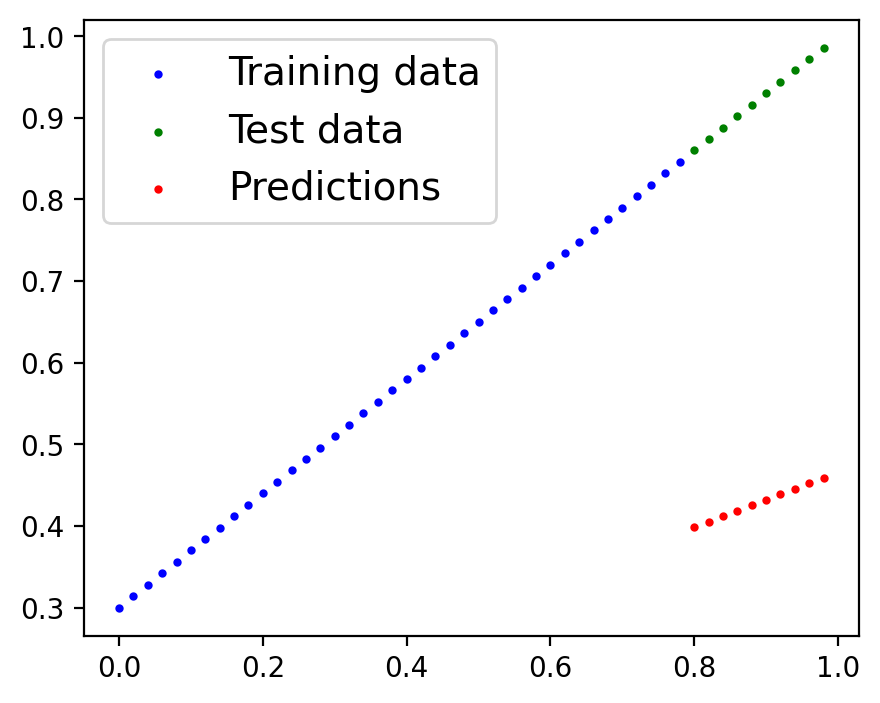

In [52]:
plot_prediction(predictions=y_preds)

# 4. Train Model

Move from some unknown parameters to some known parameters

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.
* **Loss function:** A function to measure how wrong your model's predictions of the ideal outputs
* **Optimizer**: Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias)
